### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r"C:\Users\johnm\OneDrive\Desktop\train_dataset.zip")
df1.head()                  

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,1,0.755167
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,1,0,0,0,1,0,0,0.535678
2,3,0.80,4.15,NaN,1440,0,0.0,0,0,7.0,...,0,1,0,0,0,0,0,0,1,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,0,1,0,0,0,0,0,1,0.581131
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,0,1,1,0,0,0,0,0,0.790003


### Explore the Dateset

In [3]:
df1.shape # training set, has extra column, the target column to train on

(1017, 26)

In [5]:
df1.isnull().count()

team                     1017
targeted_productivity    1017
smv                      1017
wip                      1017
over_time                1017
incentive                1017
idle_time                1017
idle_men                 1017
no_of_style_change       1017
no_of_workers            1017
month                    1017
quarter_Quarter1         1017
quarter_Quarter2         1017
quarter_Quarter3         1017
quarter_Quarter4         1017
quarter_Quarter5         1017
department_finishing     1017
department_finishing     1017
department_sweing        1017
day_Monday               1017
day_Saturday             1017
day_Sunday               1017
day_Thursday             1017
day_Tuesday              1017
day_Wednesday            1017
actual_productivity      1017
dtype: int64

In [9]:
df1.dtypes

team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
month                      int64
quarter_Quarter1           int64
quarter_Quarter2           int64
quarter_Quarter3           int64
quarter_Quarter4           int64
quarter_Quarter5           int64
department_finishing       int64
department_finishing       int64
department_sweing          int64
day_Monday                 int64
day_Saturday               int64
day_Sunday                 int64
day_Thursday               int64
day_Tuesday                int64
day_Wednesday              int64
actual_productivity      float64
dtype: object

In [10]:
df1.info()
# more nan observations in wip column than observations, will think about dropping that column, but upon the corr matrix it is highly coorrelated with over_time, department sweing and no of workers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

In [11]:
# we will fill nan with mean instead
df1["wip"] = df1["wip"].fillna(df1["wip"].mean())

In [12]:
pd.isnull(df1).sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
actual_productivity      0
dtype: int64

### Deploy Graphs to further explore the data

[Text(0.5, 1.0, 'Actual productivity gained')]

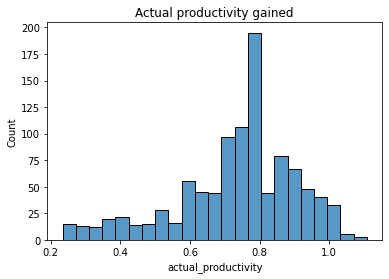

In [13]:
sns.histplot(df1['actual_productivity']).set(title="Actual productivity gained")

array([<AxesSubplot:>], dtype=object)

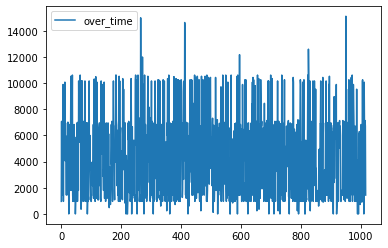

In [14]:
data1 = df1[["over_time"]]
data1.plot(subplots = True)

<AxesSubplot:>

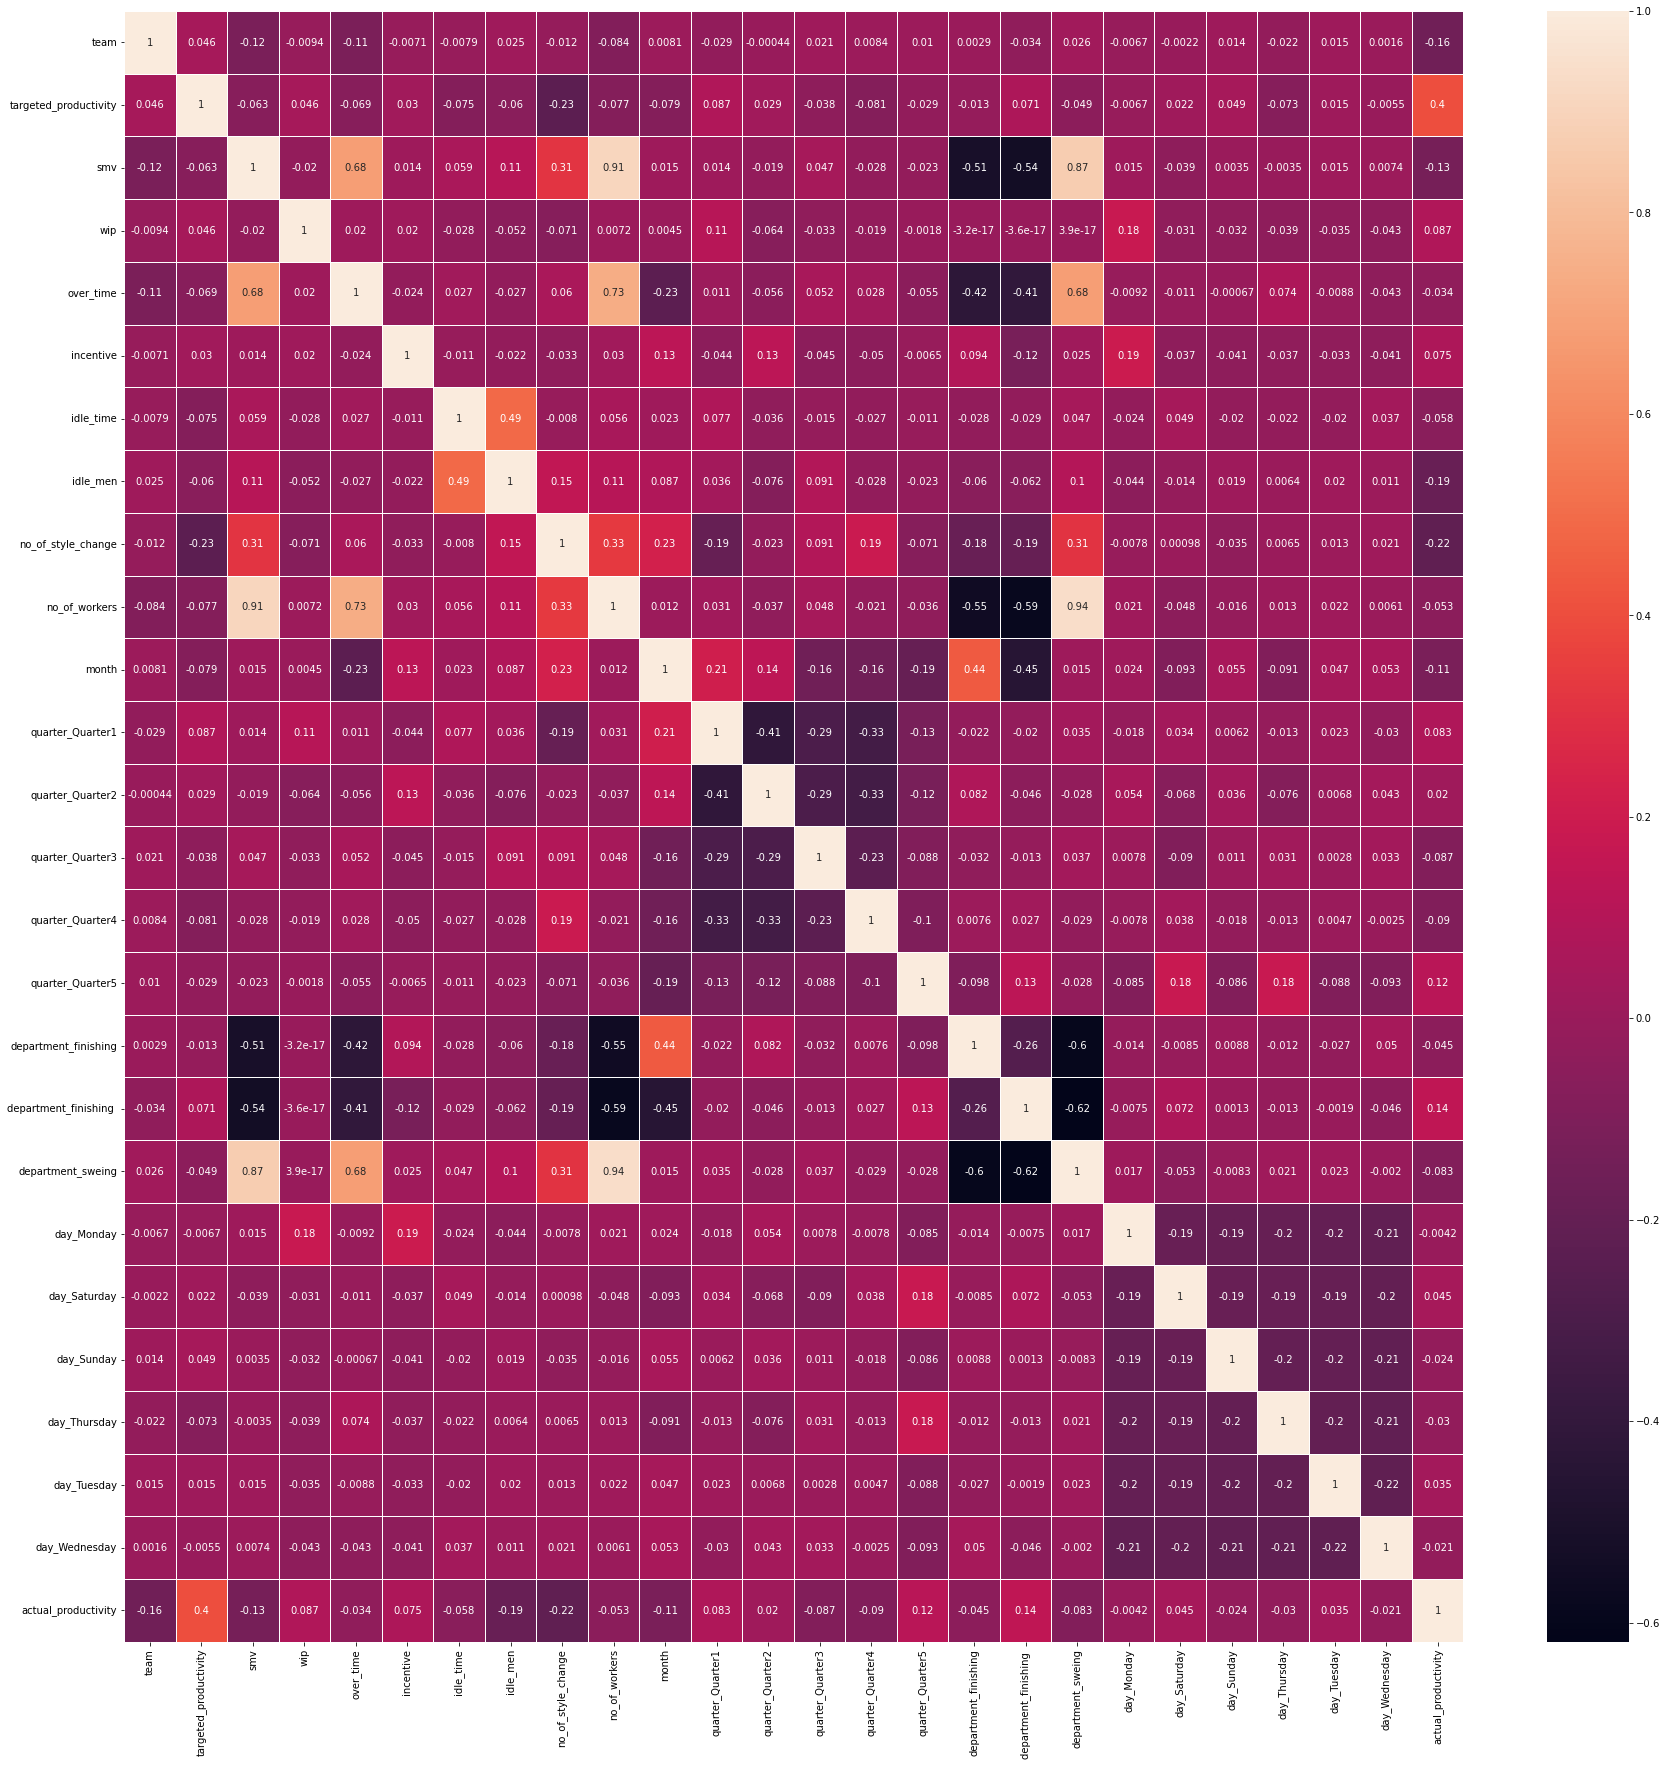

In [15]:
corrMatrix = df1.corr()
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)


#### Department_sweing had high coorleations with SMV, Overtime,number of workers and department finishings. No other feature had as many coorleationships as department_sweing. Number of Workers was associated with SMV and overtime.

In [16]:
x = df1.iloc[:,:-1]
y = df1["actual_productivity"]

In [17]:
x.shape

(1017, 25)

In [18]:
y.shape

(1017,)

### Importing Regression libraries

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb

In [20]:
# I saw this somewhere and I want to see if it works
lr = LinearRegression()
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
rfr = RandomForestRegressor()
svr = SVR()

In [21]:
for clf in (lr,knr, dtr,rfr,svr):
    clf.fit(x, y)
    y_pred = clf.predict(x)
    print("R2 Scored of ", clf.__class__.__name__, r2_score(y_pred, y))

R2 Scored of  LinearRegression -1.2265606808067826
R2 Scored of  KNeighborsRegressor -0.3162361295915186
R2 Scored of  DecisionTreeRegressor 1.0
R2 Scored of  RandomForestRegressor 0.9015018706207784
R2 Scored of  SVR -14.861040770072211


In [22]:
# The above data shows that random forest had the best R squared score and the decision tree was probably due to overfitting.

In [23]:
# Now lets get the mean squared eror
for clf in (lr,knr, dtr,rfr,svr ):
    clf.fit(x, y)
    y_pred = clf.predict(x)
    print("Mean Square Error of ", clf.__class__.__name__, mean_squared_error(y_pred, y))

Mean Square Error of  LinearRegression 0.02094504591376525
Mean Square Error of  KNeighborsRegressor 0.016760201951650264
Mean Square Error of  DecisionTreeRegressor 2.848179583439924e-33
Mean Square Error of  RandomForestRegressor 0.0021419066840856786
Mean Square Error of  SVR 0.028574282530029735


### Random forest has the lowest mean squared error and is therfor the best model. Department_sweing had high coorleations with SMV, Overtime,number of workers and department finishings. No other feature had as many coorleationships as department_sweing. Number of Workers was associated with SMV and overtime.